# Predictive Analytics for Cross-Sell Opportunities

## Step 1: Data Exploration and Preprocessing 

we'll explore the dataset to understand customer behavior, product usage patterns, and potential cross-sell opportunities.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

### 1.1 Load and Examine the Data

In [3]:
# Load the dataset
df = pd.read_csv('bank_marketing_dataset.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
df.info()

# Display first few rows
print("\nFirst few rows:")
df.head()

Dataset Shape: (41188, 21)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  fl

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 1.2 Basic Statistics and Data Quality

In [4]:
# Calculate basic statistics
print("Basic Statistics:")
df.describe()

# Check for missing values
print("\nMissing Values:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Basic Statistics:

Missing Values:
Series([], dtype: int64)


### 1.3 Customer Demographics Analysis

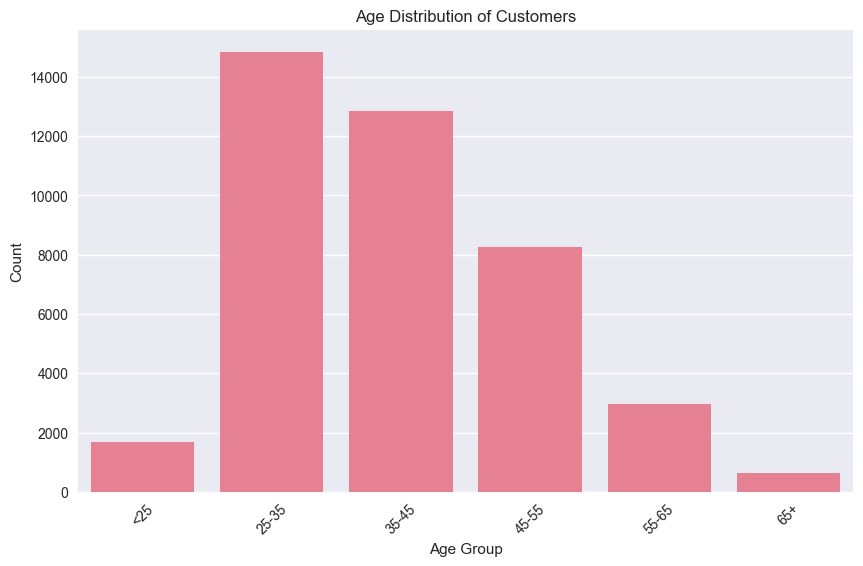

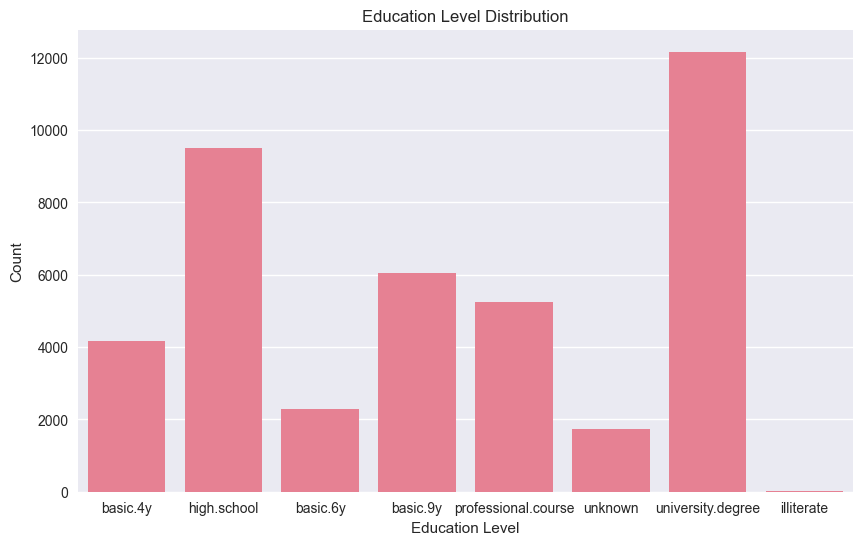

In [7]:
# Create age groups from birthyear
df['age_group'] = pd.cut(df['age'], 
                         bins=[0, 25, 35, 45, 55, 65, 100],
                         labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group')
plt.title('Age Distribution of Customers')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Plot education level distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()